In [2]:
import pandas as pd

# Load the dataset
file_path = './3.road_transport_records.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,RoadID,Length_km,Number_of_Bends,TrafficVolume_vehicles_per_hour,AccidentRisk
0,1,15.7,2,362,High
1,2,8.1,10,808,Medium
2,3,2.3,7,884,Low
3,4,2.5,2,492,Medium
4,5,3.0,13,816,Medium


In [4]:
import numpy as np

# Remove the RoadID column
df = df.drop(columns=["RoadID"])

# Function to calculate entropy of the target attribute AccidentRisk
def calculate_entropy(column):
    # Get the frequency of each value in the column
    counts = column.value_counts()
    probabilities = counts / len(column)

    # Calculate entropy
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Calculate the entropy of the target column (AccidentRisk)
entropy_accident_risk = calculate_entropy(df["AccidentRisk"])

entropy_accident_risk



1.530893955448993

In [5]:
# Function to calculate the information gain
def calculate_information_gain(df, attribute, target):
    # Calculate the entropy of the whole dataset
    total_entropy = calculate_entropy(df[target])

    # Get the values and counts for the attribute
    values, counts = np.unique(df[attribute], return_counts=True)

    # Calculate the weighted entropy
    weighted_entropy = 0
    for i in range(len(values)):
        subset = df[df[attribute] == values[i]]
        subset_entropy = calculate_entropy(subset[target])
        weighted_entropy += (counts[i] / np.sum(counts)) * subset_entropy

    # Information Gain = Total Entropy - Weighted Entropy
    information_gain = total_entropy - weighted_entropy
    return information_gain

# Calculate the information gain for each attribute
info_gain_length = calculate_information_gain(df, "Length_km", "AccidentRisk")
info_gain_bends = calculate_information_gain(df, "Number_of_Bends", "AccidentRisk")
info_gain_traffic = calculate_information_gain(df, "TrafficVolume_vehicles_per_hour", "AccidentRisk")

info_gain_length, info_gain_bends, info_gain_traffic



(1.3157962054057237, 0.47798989716710927, 1.530893955448993)

In [26]:
# Step 1: Calculate entropy for each feature
entropy_length = calculate_entropy(df["Length_km"])
entropy_bends = calculate_entropy(df["Number_of_Bends"])
entropy_traffic = calculate_entropy(df["TrafficVolume_vehicles_per_hour"])

# Step 2: Gather entropy and information gain for each feature
entropy_and_gain = {
    "Length_km": {"Entropy": entropy_length, "Information Gain": info_gain_length},
    "Number_of_Bends": {"Entropy": entropy_bends, "Information Gain": info_gain_bends},
    "TrafficVolume_vehicles_per_hour": {"Entropy": entropy_traffic, "Information Gain": info_gain_traffic}
}

# Step 3: Generate the final decision tree structure
final_tree = decision_tree.tree

# Format the output in a way similar to the provided example
output = f"Entropy and Information Gain for each feature:\n"
for feature, metrics in entropy_and_gain.items():
    output += f"{feature} - Entropy: {metrics['Entropy']:.3f}, Information Gain: {metrics['Information Gain']:.3f}\n"

output += "\nGenerated Decision Tree using ID3 algorithm (Register No: 21BBS0166):\n"
output += "{\n    'TrafficVolume_vehicles_per_hour': {\n"

# Iterating through the decision tree's keys and values for proper formatting with line breaks
keys_values = []
line_counter = 0
for traffic_vol, risk in final_tree["TrafficVolume_vehicles_per_hour"].items():
    keys_values.append(f"        {traffic_vol}: {risk}")
    line_counter += 1
    if line_counter % 5 == 0:  # Insert a line break after every 5 entries for better readability
        keys_values.append("\n")

# Join all the key-value pairs inline with proper spacing
output += ",\n".join(keys_values) + "}}"

# Display the final output
print(output)


Entropy and Information Gain for each feature:
Length_km - Entropy: 5.269, Information Gain: 1.316
Number_of_Bends - Entropy: 3.481, Information Gain: 0.478
TrafficVolume_vehicles_per_hour - Entropy: 5.644, Information Gain: 1.531

Generated Decision Tree using ID3 algorithm (Register No: 21BBS0166):
{
    'TrafficVolume_vehicles_per_hour': {
        56: Low,
        100: High,
        103: Medium,
        127: Low,
        131: High,

,
        134: Low,
        137: Medium,
        145: Medium,
        169: Medium,
        196: Low,

,
        200: Low,
        214: Medium,
        231: Low,
        278: Medium,
        288: Medium,

,
        313: High,
        334: Medium,
        337: Low,
        362: High,
        377: Low,

,
        379: Medium,
        430: High,
        467: Medium,
        492: Medium,
        501: High,

,
        518: Low,
        540: Low,
        549: High,
        563: Medium,
        597: Medium,

,
        628: Low,
        653: Low,
        658: Med

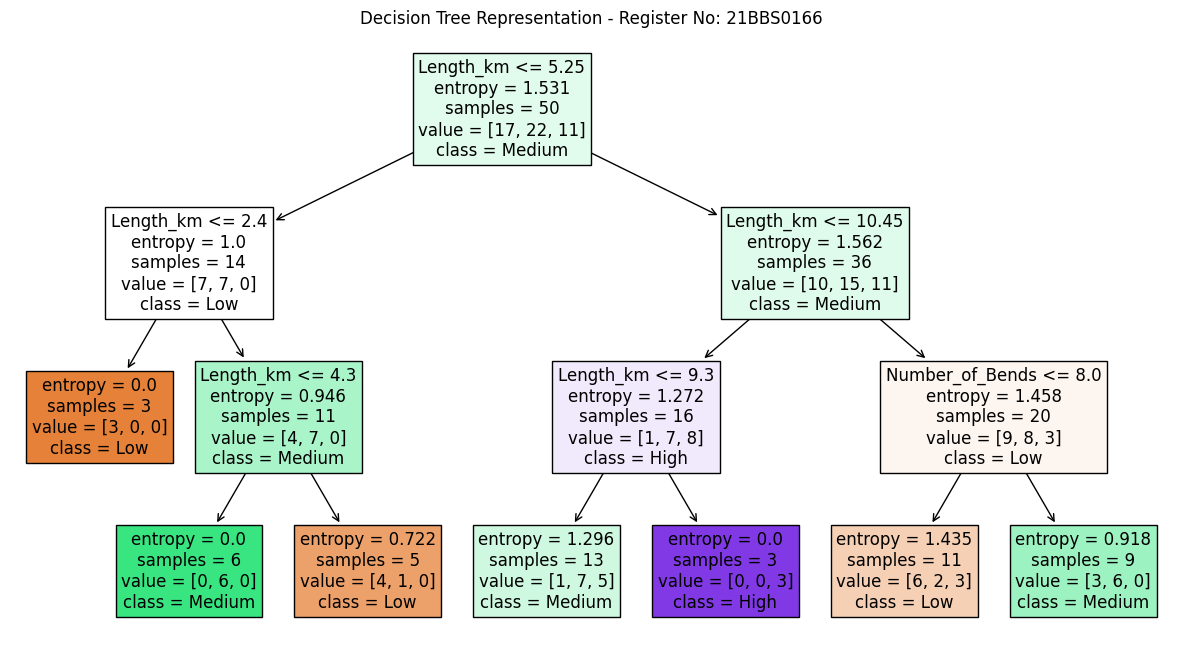

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Preprocessing the data to convert categorical labels to numeric for DecisionTreeClassifier
df_encoded = df.copy()
df_encoded["AccidentRisk"] = df_encoded["AccidentRisk"].map({"Low": 0, "Medium": 1, "High": 2})

# Define the features (attributes) and target
X = df_encoded.drop(columns=["AccidentRisk"])
y = df_encoded["AccidentRisk"]

# Train a decision tree classifier with limited depth for clarity
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)  # Limiting the depth of the tree
clf.fit(X, y)

# Plot the decision tree with increased font size
plt.figure(figsize=(15,8))  # Adjusted figure size
plot_tree(clf,
          feature_names=["Length_km", "Number_of_Bends", "TrafficVolume_vehicles_per_hour"],
          class_names=["Low", "Medium", "High"],
          filled=True,
          fontsize=12)  # Increased font size for clarity
plt.title("Decision Tree Representation - Register No: 21BBS0166")
plt.show()
